This notebook is a first look at the structure of NRES spectrum files.

In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
from tqdm import tqdm
import matplotlib.animation as ani

Here are all the files.

In [2]:
filenames = glob.glob('data/NRES/*e92-1d.fits.fz')

 40%|███▉      | 27/68 [04:25<06:52, 10.05s/it]C:\Users\wwaal\.conda\envs\stellar\lib\site-packages\matplotlib\axes\_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
 44%|████▍     | 30/68 [04:55<06:24, 10.12s/it]C:\Users\wwaal\.conda\envs\stellar\lib\site-packages\matplotlib\axes\_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
 47%|████▋     | 32/68 [05:16<06:14, 10.40s/it]C:\Users\wwaal\.conda\envs\stellar\lib\site-packages\matplotlib\axes\_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
C:\Users\wwaal\.conda\envs\stellar\lib\site-packages\matplotlib\axes\_axes.py:3465: RuntimeWarning: invalid value encountered in add
  low, high = dep + np.row_stack([-(1 - lolims), 1 - uplims]) * err
 49%|████▊     | 33/68 [05:27<06:10, 10.58s/it]C:\Users

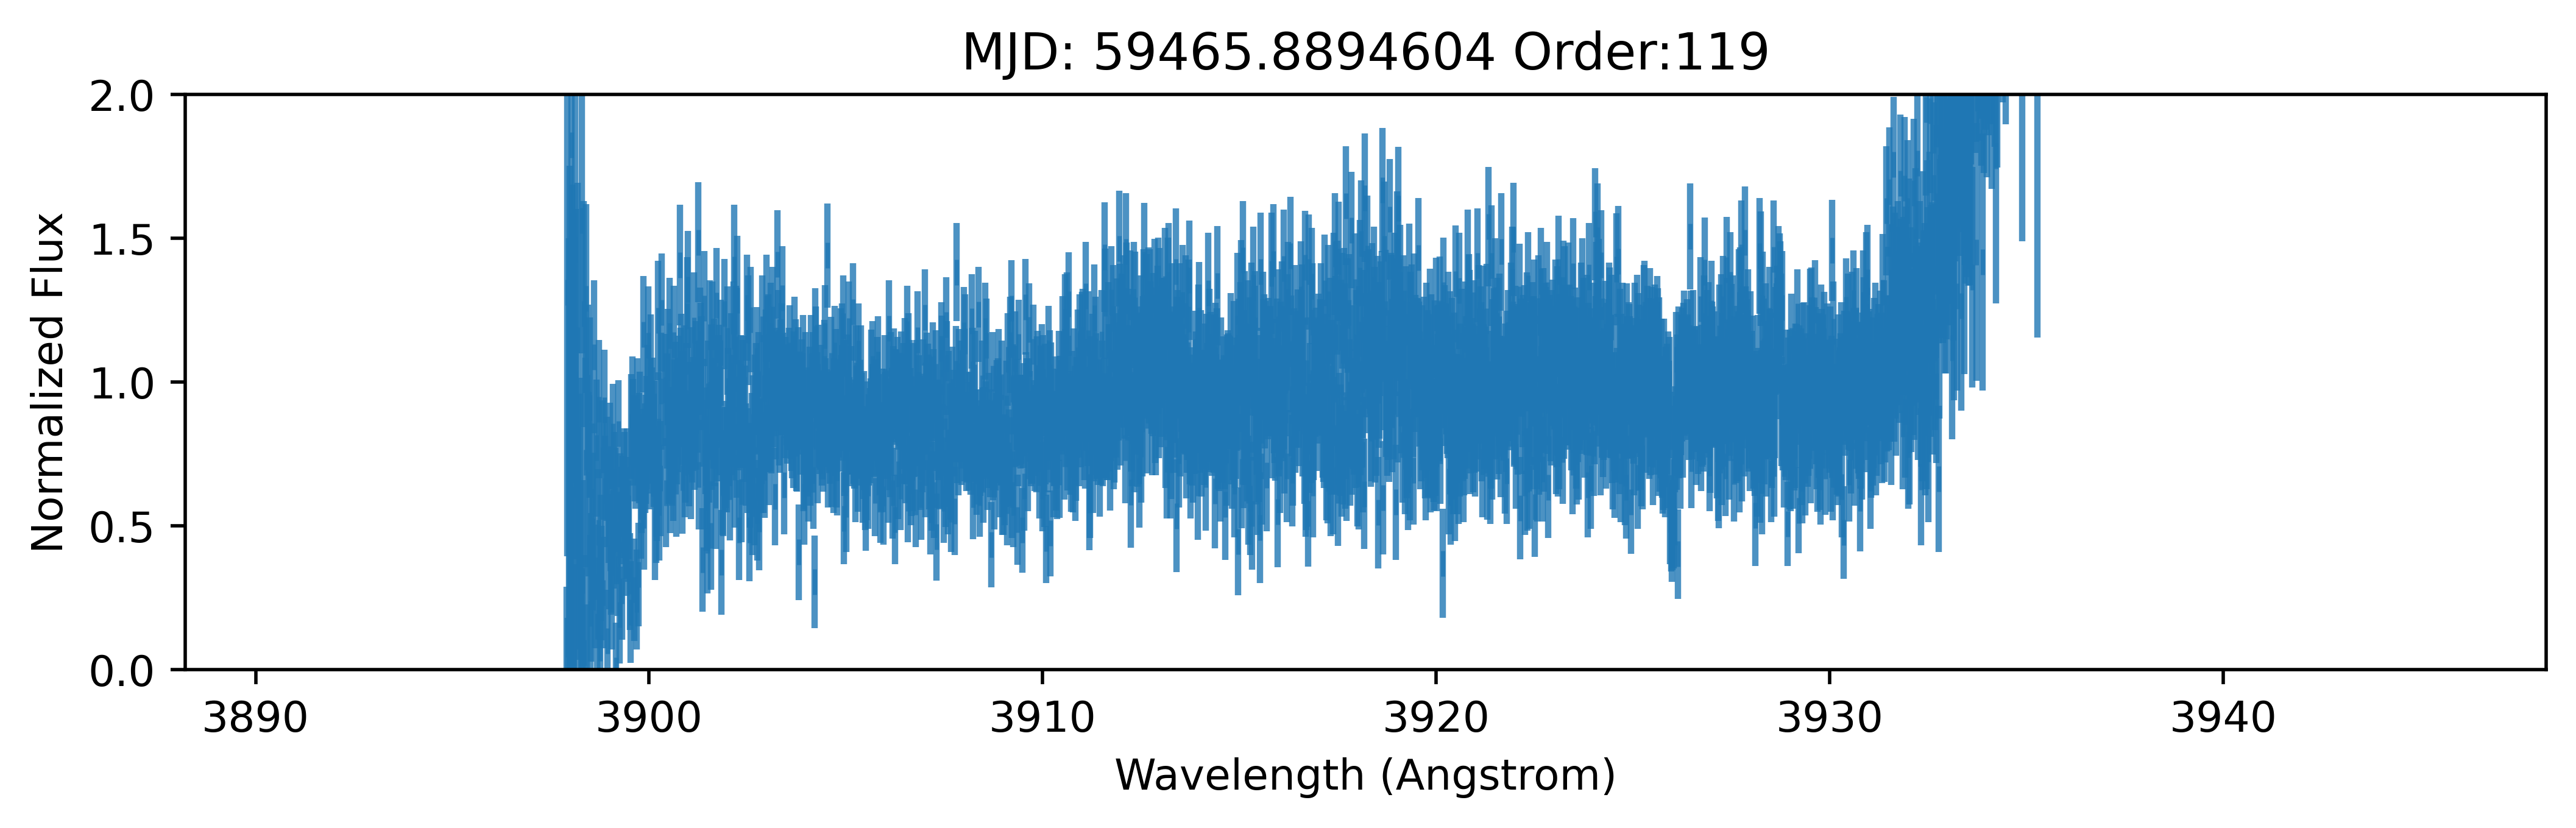

In [3]:
# create a matplotlib figure
figure = plt.figure(figsize=(10, 2.5), dpi=500)

# initialize the animator
writer = ani.PillowWriter(fps=5, bitrate=1000)
#writer = ani.FFMpegWriter(fps=5, bitrate=1000)

# create an x-axis
#x = np.linspace(-5, 35, 1000)

for j in tqdm(range(68)):
    
    ordernum = j+52
# the "with" construction is a little confusing (= copy and paste it?)
    with writer.saving(figure, f'movies/order_{ordernum}.gif', figure.get_dpi()):

        # loop over exposures
        for i in range(len(filenames)):

            # redefine the array of y values
            f = filenames[i]
            hdu = fits.open(f)

            date = hdu['PRIMARY'].header['MJD-OBS']

            science_fiber_id = hdu['PRIMARY'].header['SCIFIBER']
            is_science = hdu['SPECTRUM'].data['FIBER'] == science_fiber_id
            data = hdu['SPECTRUM'].data[is_science]

            this_order = data[j]
            order = this_order['ORDER']

            ok = this_order['MASK'] == 0

            # these should be the good data for the particular order in question
            good_wavelengths = this_order['WAVELENGTH'][ok]
            good_normalized_fluxes = this_order['NORMFLUX'][ok]
            good_normalized_uncertainties = this_order['NORMUNCERTAINTY'][ok]

            if i == 0:
                center = np.median(good_wavelengths)

            # clear any data that's on the axes
            plt.cla()

            # plot the new data
            plt.errorbar(good_wavelengths, good_normalized_fluxes, good_normalized_uncertainties, fmt='|',alpha=0.8)
            plt.xlabel('Wavelength (Angstrom)')
            plt.ylabel('Normalized Flux')
            plt.title(f'MJD: {date} Order:{order}')
            plt.ylim(0,2)
            plt.xlim(center-30,center+30)

            # save this snapshot to a movie frame
            writer.grab_frame()